In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import warnings
warnings.filterwarnings("ignore")

In [56]:
pwd

'C:\\Users\\HP'

In [2]:
 !pip install plotly==5.14.1

In [3]:
pwd

'C:\\Users\\HP'

In [4]:
df = pd.read_csv('Cancer_Data.csv')

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.shape

(569, 33)

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [11]:
df.drop(columns='id',axis=1,inplace=True)
df.drop(columns='Unnamed: 32',inplace=True)
df.rename(columns={'diagnosis':'target'},inplace=True)
df.target.value_counts()

B    357
M    212
Name: target, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

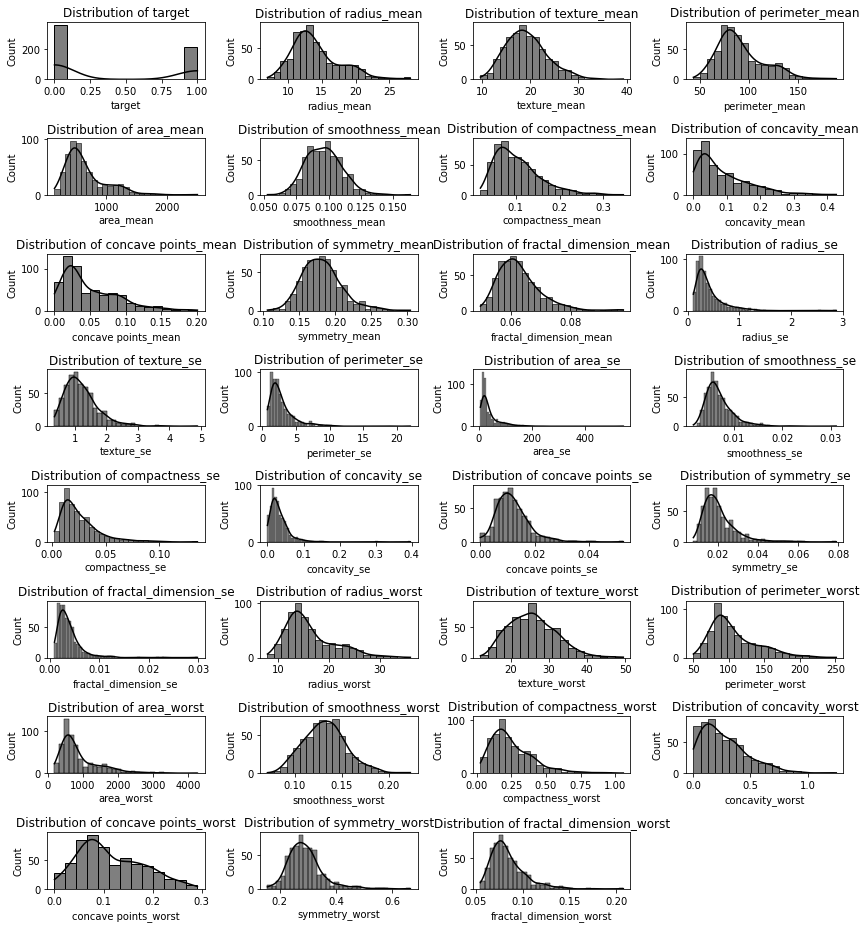

In [13]:
plt.figure(figsize=(12,13))
for i,col in enumerate(df.columns,1):
    plt.subplot(8,4,i)
    plt.title(f"Distribution of {col}")
    sns.histplot(df[col],kde=True,color='black')
    plt.tight_layout()
    plt.plot()


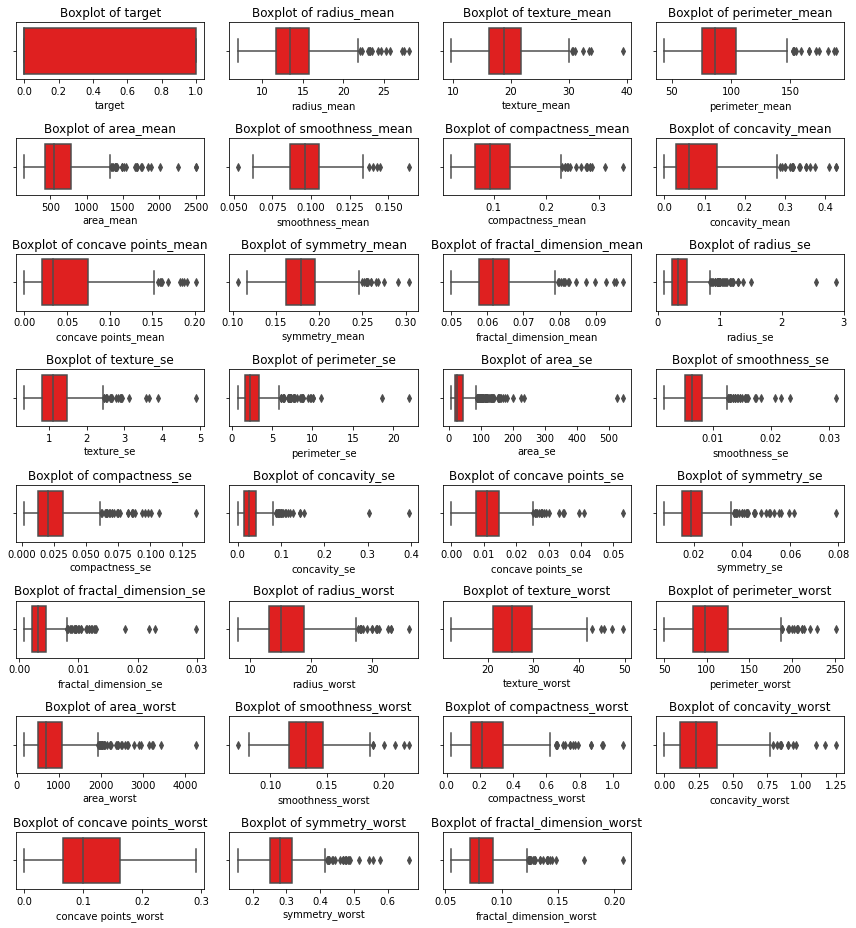

In [14]:
plt.figure(figsize=(12,13))
for i,col in enumerate(df.columns,1):
    plt.subplot(8,4,i)
    plt.title(f"Boxplot of {col}")
    sns.boxplot(x=df[col],color='red')
    plt.tight_layout()
    plt.plot()

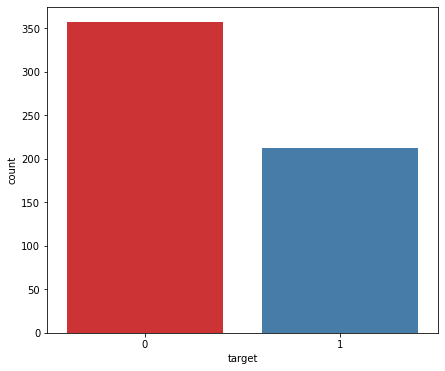

In [15]:
plt.figure(figsize=(7,6))
sns.countplot(x=df.target,palette='Set1')
plt.show()

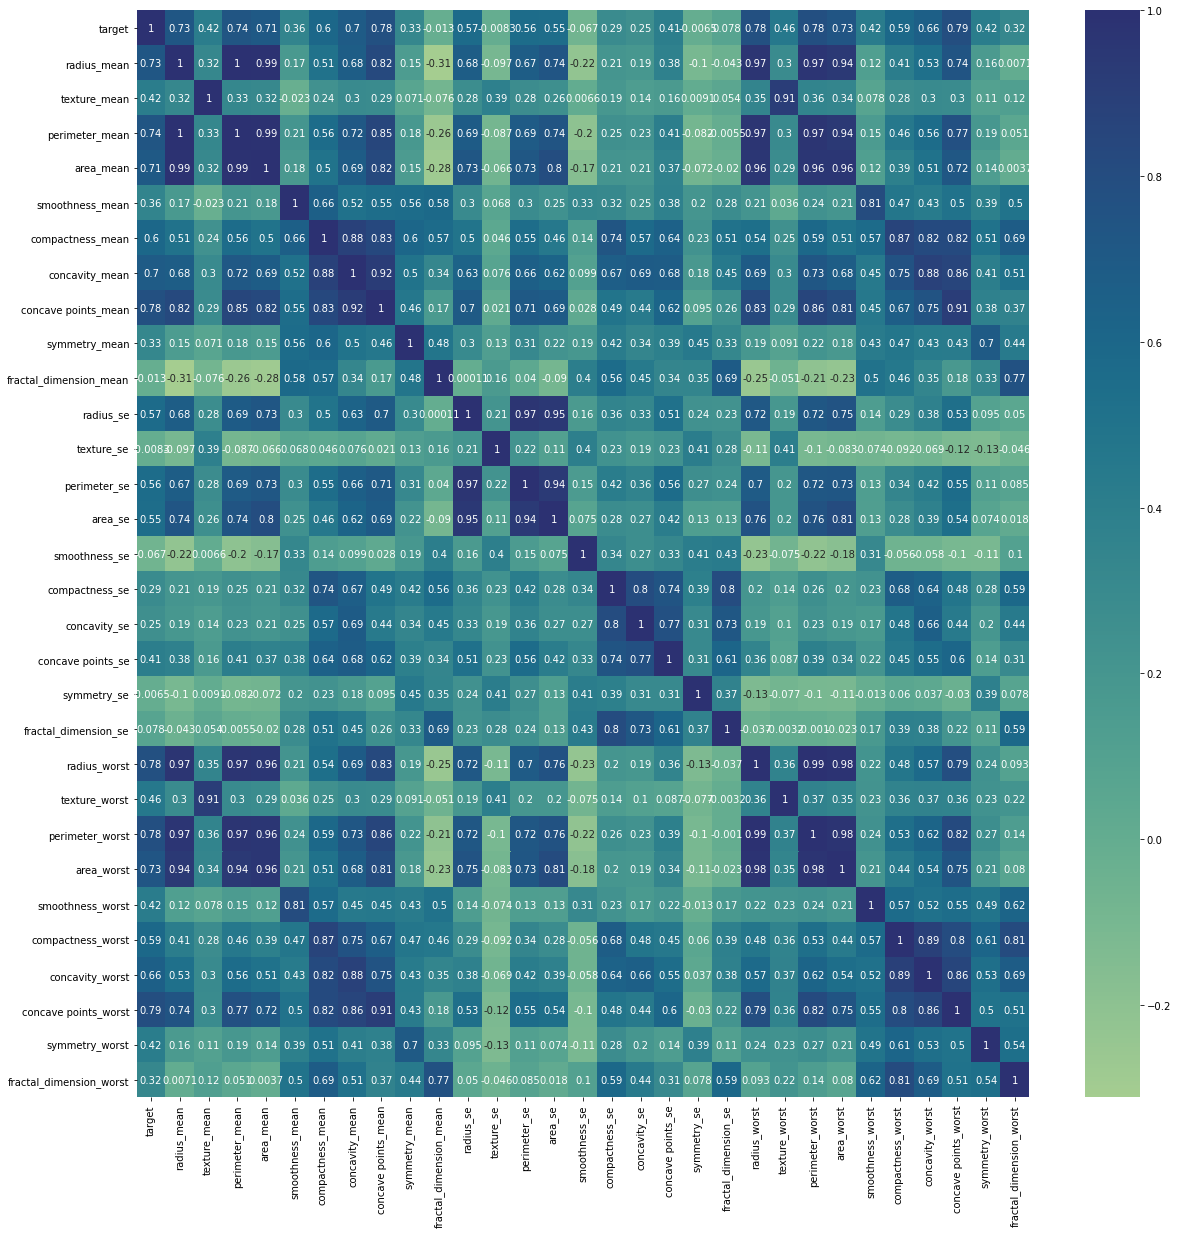

In [16]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='crest')
plt.show()

In [17]:
df1 = df.copy(deep=True)
def remove_outliers(column,dfo):
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)
    iqr = q3 - q1
    maxx = q3 + 1.5 * iqr
    minn = q1 - 1.5 * iqr
    sns.boxplot(y=df.loc[((df[column]>=minn) & (df[column]<=maxx))][column])

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

In [38]:
X = df.drop(columns='target')
y = df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =1)

In [21]:
X_train.shape,y_train.shape

((398, 30), (398,))

In [22]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.043280,0.029290,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.15820,0.180400,0.09608,0.2664,0.07809
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.1153,0.34290,0.251200,0.13390,0.2534,0.07858
529,12.07,13.44,77.83,445.2,0.11000,0.09009,0.037810,0.027980,0.1657,0.06608,...,13.45,15.77,86.92,549.9,0.1521,0.16320,0.162200,0.07393,0.2781,0.08052
422,11.61,16.02,75.46,408.2,0.10880,0.11680,0.070970,0.044970,0.1886,0.06320,...,12.64,19.67,81.93,475.7,0.1415,0.21700,0.230200,0.11050,0.2787,0.07427


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# ss = StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [26]:
algos = [RandomForestClassifier(),BaggingClassifier(),DecisionTreeClassifier(),SVC(),LogisticRegression()]
for algo in algos:
    print(str(algo))
    cs = cross_val_score(algo,X,y)
    print("cross_val_score: ",cs)
    print("average ",sum(cs)/len(cs))
    print('')

RandomForestClassifier()
cross_val_score:  [0.92105263 0.93859649 0.99122807 0.97368421 0.96460177]
average  0.9578326346840553

BaggingClassifier()
cross_val_score:  [0.90350877 0.92982456 0.96491228 0.97368421 0.98230088]
average  0.9508461419034312

DecisionTreeClassifier()
cross_val_score:  [0.9122807  0.9122807  0.92105263 0.95614035 0.89380531]
average  0.9191119391398852

SVC()
cross_val_score:  [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
average  0.9121720229777983

LogisticRegression()
cross_val_score:  [0.93859649 0.93859649 0.95614035 0.9122807  0.95575221]
average  0.9402732494954199



In [27]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
y_pred = model.predict(X_test)
prob =model.predict_proba(X_test)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print('Train Score : ', model.score(X_train, y_train))
print('Test Score : ', model.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, prob[:, 1]))


Train Score :  1.0
Test Score :  0.9532163742690059
Accuracy Score :  0.9532163742690059
ROC-AUC score test dataset:  0.9807466196355085


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [32]:
calc_vif(X)

,Feature,VIF
0,radius_mean,63306.17
2,perimeter_mean,58123.59
20,radius_worst,9674.74
22,perimeter_worst,4487.78
3,area_mean,1287.26
23,area_worst,1138.76
9,fractal_dimension_mean,629.68
29,fractal_dimension_worst,423.40
4,smoothness_mean,393.40
24,smoothness_worst,375.60


In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[105   3]
 [  5  58]]


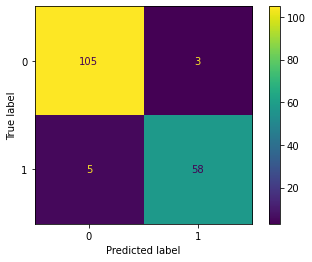

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

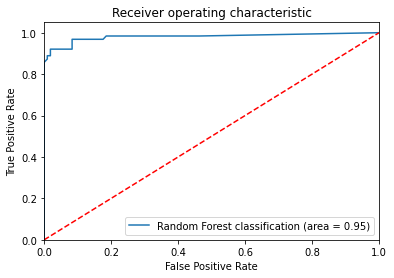

In [36]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest classification (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [39]:
X = X.drop(columns=['radius_worst','perimeter_worst','area_worst','fractal_dimension_worst',
                    'smoothness_mean','texture_worst','perimeter_mean','radius_mean'])

In [51]:
model1 = RandomForestClassifier(n_estimators=100)
model1.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred1 = model.predict(X_test)
prob1 =model.predict_proba(X_test)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print('Train Score : ', model1.score(X_train, y_train))
print('Test Score : ', model1.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred1))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, prob1[:, 1]))

Train Score :  1.0
Test Score :  0.9532163742690059
Accuracy Score :  0.9532163742690059
ROC-AUC score test dataset:  0.9807466196355085


In [54]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



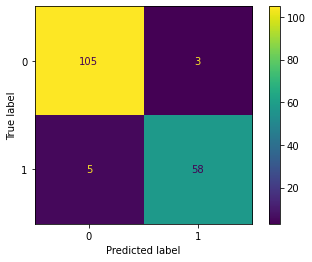

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test, y_pred1, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model1.classes_)
disp.plot()
plt.show()

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif
calc_vif(X)

,Feature,VIF
6,fractal_dimension_mean,194.42
17,smoothness_worst,176.12
21,symmetry_worst,172.93
5,symmetry_mean,158.80
3,concavity_mean,136.41
4,concave points_mean,134.62
20,concave points_worst,124.35
2,compactness_mean,104.12
7,radius_se,99.93
18,compactness_worst,91.57


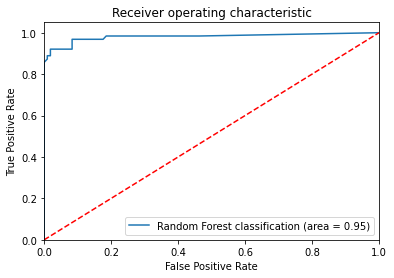

In [47]:
logit_roc_auc = roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, prob1[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest classification (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()